# Business Understanding
Grocery stores handle large quantities of fruits every day. It's important that they are able to catagorize them and determine whether they are fresh or rotten. That's where this dataset come in. The dataset we chose is a collection of images of strawberries, peaches, and pomegranates. The images are classified as either fresh or rotten and as strawberry, peach, or pomegranete. This model could be used by grocery stores to help them catagorize their fruits and determine which ones are fresh and which ones are rotten which could help them reduce waste and increase profits. It could also be used in farming to help determine at a large scale which fruits are fresh and able to be sold, and which are rotten, and can be used for other purposes, making sure that the two do not accidentally get mixed together. This model can be used to identify the freshness of the fruit and can be handled accordingly. This data is important because of certain regulations and standards set by grocery stores and restaurants, it is crucial to not sell or serve rotten food as that would lead to serious health concerns. To be used used by these third-parties, we believe that it should be able to reliable be able to distinguish between rotten and fresh fruits for the fruits included in the data set, otherwise the error would be to great and would not be of any commercial use to these companies. For example, if a shipment of pomegranites, strawberries, and peaches arrive to a restaurant, and 90% were fresh, and somehow the chef did not notice and accidentally prepared a dish with rotten fruit, that would mean that one in ten people are at risk.

# Data Understanding
Each image is a .jpg with a white background and an image size of 300*300. The classifications are stored in the file names. We did some reorganizing of the files into different folders to make it easier to read in. After loading the images, we first do some preprocessing to each image including resizing the images and then flattening th images. Finally we store the classification information in a target array.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Classifcation categories
fruits = ['peach', 'pomegranate', 'strawberry']
fruit_type = ['fresh', 'rotten']

# Set the image size
h, w = 50, 50

# Load the image data
data_set = [] # Image data
dataset_target = [] # Target information, [fresh/rotten, fruit type]

for fruit in fruits:
    for ft in fruit_type:
        # Open the directory
        path = f'./data/{ft}/{fruit}'

        # Load the image data
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))

            # Set color to RGB
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

            # Resize the image
            img_array = cv2.resize(img_array, (h, w))

            # Flatten the image
            img_array = img_array.flatten()
            data_set.append(img_array)

            # Add the target information
            dataset_target.append(list([ft, fruit]))


print(f'Loaded {len(data_set)} images')
print(f'{data_set[0].shape[0]} features per image')

Loaded 1655 images
7500 features per image


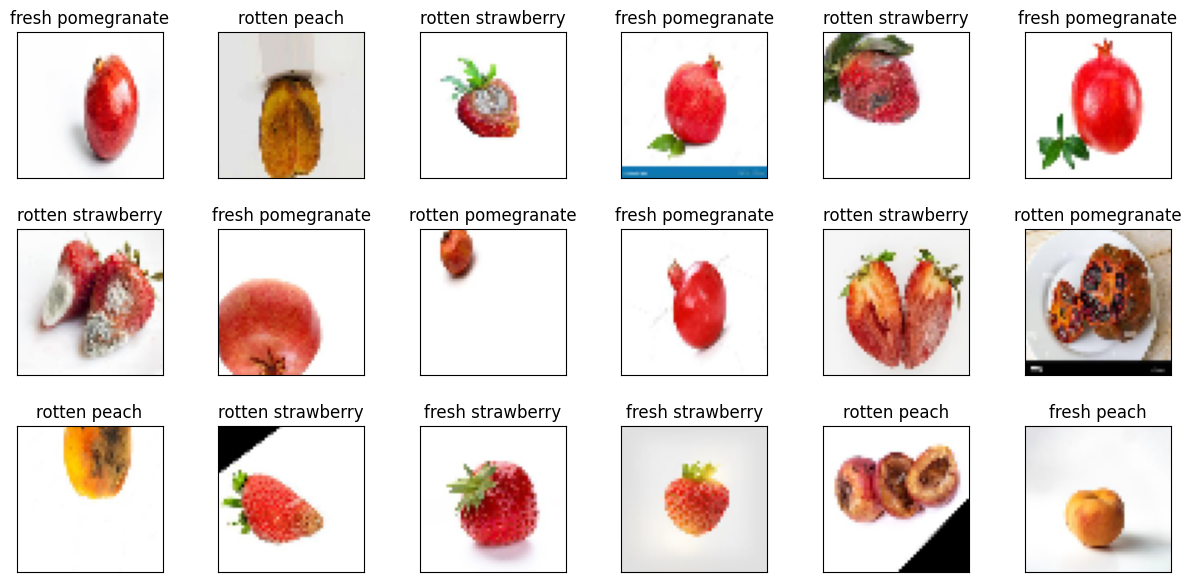

In [181]:
import random

def plot_rand_gallery(images, titles, h, w, n_row=3, n_col=6):
    plt.figure(figsize=(2 * n_col, 2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    plot_index=random.sample(range(0,len(data_set)),n_row * n_col)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[plot_index[i]].reshape((h, w, 3)))
        title = titles[plot_index[i]][0] + " " + titles[plot_index[i]][1]
        plt.title(title, size=12)
        plt.xticks(())
        plt.yticks(())

plot_rand_gallery(data_set, dataset_target, h, w)

# PCA

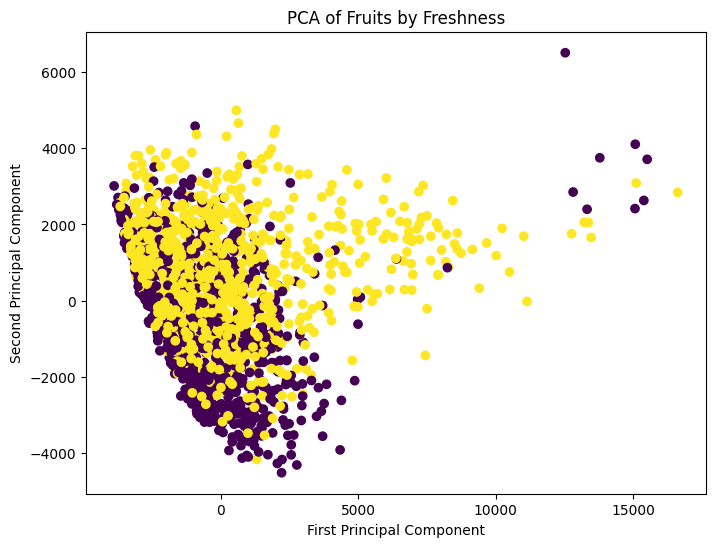

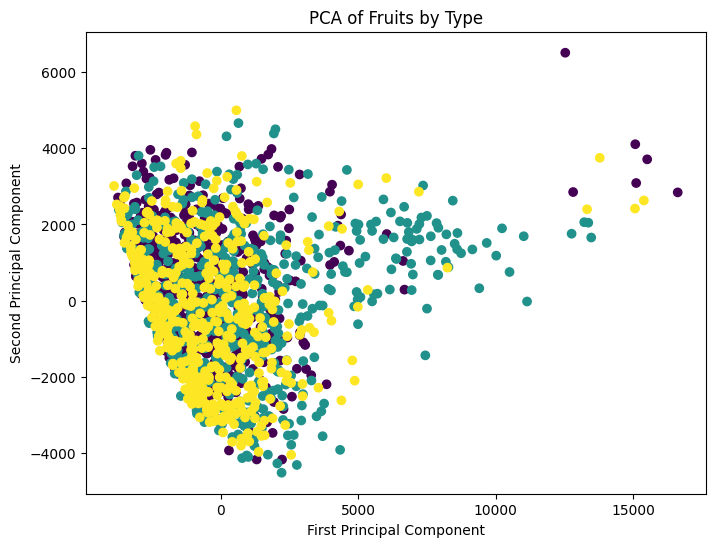

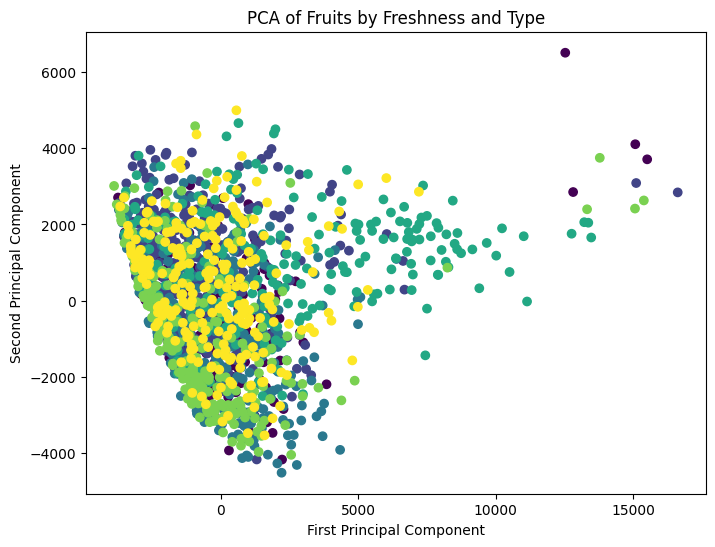

In [182]:
# PCA for dimensionality reduction
from sklearn.decomposition import PCA
 
# Perform PCA
pca = PCA(n_components=2)
data_set_pca = pca.fit_transform(data_set)

# Plot the PCA
plt.figure(figsize=(8, 6))  
plt.scatter(data_set_pca[:, 0], data_set_pca[:, 1], c=[0 if x[0] == 'fresh' else 1 for x in dataset_target])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.title('PCA of Fruits by Freshness')

plt.show()

# PCA of fruits by type
plt.figure(figsize=(8, 6))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.scatter(data_set_pca[:, 0], data_set_pca[:, 1], c=[0 if x[1] == 'peach' else 1 if x[1] == 'pomegranate' else 2 for x in dataset_target])

plt.title('PCA of Fruits by Type')

plt.show()

# PCA of fruits by freshness and type
plt.figure(figsize=(8, 6))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.scatter(data_set_pca[:, 0], 
            data_set_pca[:, 1],
            c=[0 if x[0] == 'fresh' and x[1] == 'peach' else 1 if x[0] == 'rotten' and x[1] == 'peach' else 2 if x[0] == 'fresh' and x[1] == 'pomegranate' else 3 if x[0] == 'rotten' and x[1] == 'pomegranate' else 4 if x[0] == 'fresh' and x[1] == 'strawberry' else 5 for x in dataset_target])

plt.title('PCA of Fruits by Freshness and Type')
plt.show()



We initially tried to use PCA to try to reduce the dimensionality of the the images by using only 2 dimensions. However, we found that the images were not well suited for 2 dimensional PCA. Plotted above are the graphs showing different coloring of the images based on the different classifications. We can see that the images are not well separated and that 2-dimensional PCA is not a good way to reduce the dimensionality of the images. This led us to try to increase the number of dimensions to 3 which is shown in the next section.

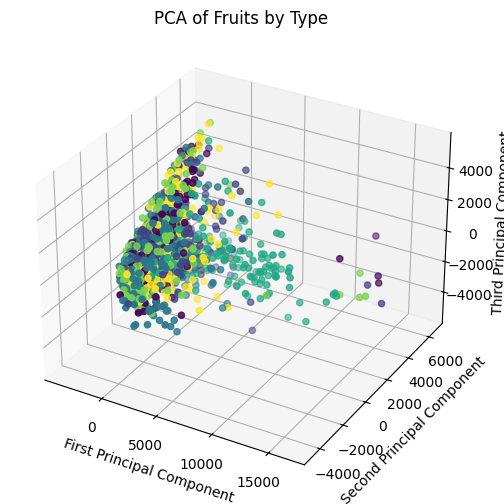

In [183]:
# PCA with 3 components
pca = PCA(n_components=3)
pca.fit(data_set)
data_set_pca = pca.transform(data_set)

# Plot the PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_set_pca[:, 0], 
           data_set_pca[:, 1], 
           data_set_pca[:, 2], 
           c=[0 if x[0] == 'fresh' and x[1] == 'peach' else 1 if x[0] == 'rotten' and x[1] == 'peach' else 2 if x[0] == 'fresh' and x[1] == 'pomegranate' else 3 if x[0] == 'rotten' and x[1] == 'pomegranate' else 4 if x[0] == 'fresh' and x[1] == 'strawberry' else 5 for x in dataset_target])


ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.title('PCA of Fruits by Type')

plt.show()


We can see a little bit of seperation between some of the classes but it is not enough to be useful for our purposes. Our next thought was to try to reduce the number of classes to see if that would help (for instance only comparing pomegranates and strawberries) which is shown in the next section.

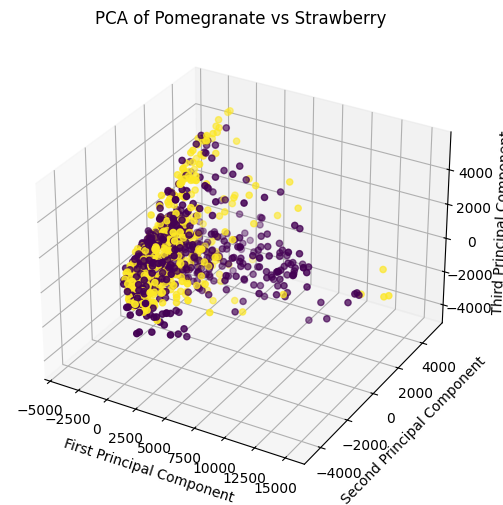

In [184]:
# PCA between pomegranate and strawberry only
pomegranate_strawberry = [x for x in dataset_target if x[1] in ['pomegranate', 'strawberry']]
pomegranate_strawberry_data = [data_set[i] for i, x in enumerate(dataset_target) if x[1] in ['pomegranate', 'strawberry']]
pca = PCA(n_components=3)
pca.fit(pomegranate_strawberry_data)
pomegranate_strawberry_data_pca = pca.transform(pomegranate_strawberry_data)

# Plot the PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pomegranate_strawberry_data_pca[:, 0], pomegranate_strawberry_data_pca[:, 1], pomegranate_strawberry_data_pca[:, 2], c=[0 if x[1] == 'pomegranate' else 1 for x in pomegranate_strawberry])

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

plt.title('PCA of Pomegranate vs Strawberry')

plt.show()

As can be seen, we still were unable to get any useful information from 

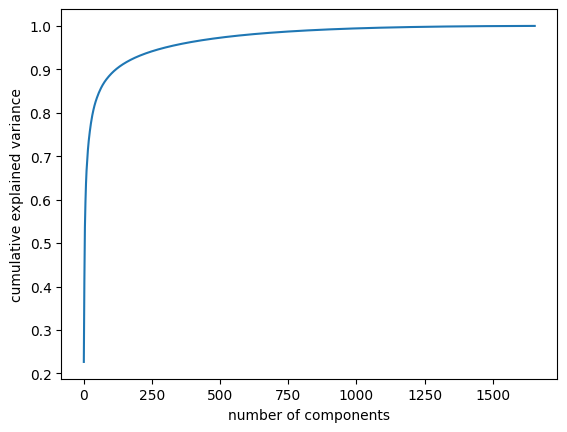

Number of components to explain 80% of the variance: 34


In [185]:
# Determine the number of components to use
# Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
pca = PCA().fit(data_set)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

# Get the number of components that explain 80% of the variance
pca = PCA(0.80)
pca.fit(data_set)
print(f'Number of components to explain 80% of the variance: {pca.n_components_}')

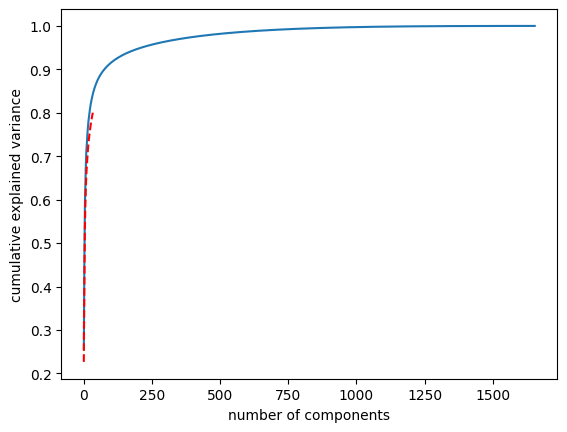

Number of components to explain 80% of the variance: 22


In [186]:
# Covert images to grayscale
data_set_gray = [cv2.cvtColor(x.reshape((h, w, 3)), cv2.COLOR_RGB2GRAY).flatten() for x in data_set]

# Compare the number of components to use
pca_grayscale = PCA().fit(data_set_gray)
plt.plot(np.cumsum(pca_grayscale.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

# Get the number of components that explain 80% of the variance
pca_grayscale = PCA(0.80)
pca_grayscale.fit(data_set_gray)
print(f'Number of components to explain 80% of the variance: {pca_grayscale.n_components_}')



## Feature Extraction using DAISY

C:\Users\E5535\AppData\Local\Temp\ipykernel_103860\219810073.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  idx_to_reconstruct = int(np.random.rand(1)*len(data_set))


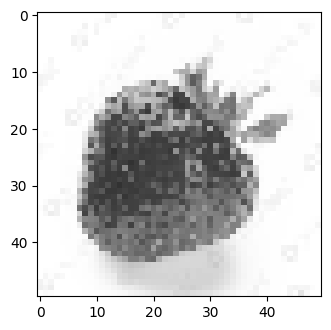

In [187]:
from skimage.io import imshow

#Selecting an image to visualize the DAISY descriptor 
plt.subplot(1,2,1)
idx_to_reconstruct = int(np.random.rand(1)*len(data_set))
img  = data_set_gray[idx_to_reconstruct].reshape(50,50)
imshow(img)
plt.grid(False)

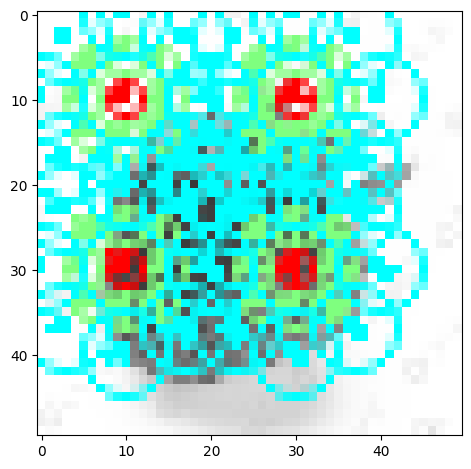

In [188]:
#Visualizing what the descriptor looks like
from skimage.feature import daisy

#lets first visualize what the DAISY descriptor looks like
features, img_desc = daisy(img, 
                            step=20, 
                           radius=10, 
                           rings=2, 
                           histograms=8, 
                           orientations=8, 
                           visualize=True)
imshow(img_desc)
plt.grid(False)
plt.show()

In [189]:
features = daisy(img, step=10, radius=20, rings=2, histograms=8, orientations=4, visualize=False)

def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape), step=10, radius=20, 
                 rings=2, histograms=8, orientations=4, 
                 visualize=False)
    return feat.reshape((-1))

In [190]:
daisy_features = np.apply_along_axis(apply_daisy, 1, data_set_gray, (h,w))

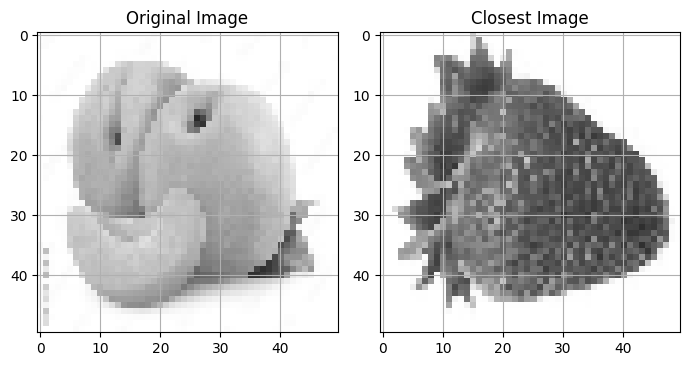

In [191]:
from sklearn.metrics.pairwise import pairwise_distances
import copy

dist_matrix = pairwise_distances(daisy_features)
idx1 = 1
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty 
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(data_set_gray[idx1].reshape((h,w)))
plt.title("Original Image")
plt.grid()

plt.subplot(1,2,2)
imshow(data_set_gray[idx2].reshape((h,w)))
plt.title("Closest Image")
plt.grid()

Its not looking like the DAISY features will be useful to us, but we will make a KNN classifier to make sure.

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier

#Creating dataset with PCA feature vector applied
pca_obj = PCA(n_components=22)
dataset_pca_features = pca_obj.fit_transform(data_set_gray)

# init a classifier for each feature space
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_dsy = KNeighborsClassifier(n_neighbors=1)
classifier_pca = MultiOutputClassifier(knn_pca, n_jobs=-1)
classifier_dsy = MultiOutputClassifier(knn_dsy, n_jobs=-1)

# separate the data into train/test
pca_train, pca_test, dsy_train, dsy_test, y_train, y_test = train_test_split(
    dataset_pca_features,daisy_features, dataset_target, test_size=0.2, train_size=0.8)

# fit each classifier and calculate predicted values
classifier_pca.fit(pca_train,y_train)
pred_pca = classifier_pca.predict(pca_test)

classifier_dsy.fit(dsy_train,y_train)
pred_dsy = classifier_dsy.predict(dsy_test)

#Printing results
print("PCA classifier score:", classifier_pca.score(pca_test, np.array(y_test)))
print("DAISY classifier score:", classifier_dsy.score(dsy_test, np.array(y_test)))

PCA classifier score: 0.34441087613293053
DAISY classifier score: 0.3685800604229607


The results are not particularly promising as the accuracy scores for each classifier are relatievly the same

## Key Point Matching 

# Sources
- https://www.kaggle.com/datasets/alihasnainch/fruits-dataset-for-classification
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html